<a href="https://colab.research.google.com/github/PoojaNayak2/Forcasting-the-Solar-Power-generation/blob/main/SolarPowerGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [ ]:
#data_path = r'drive/My Drive/Proj/S.P.F./solarpowergeneration.csv'
dts = pd.read_csv(r'/content/solarpowergeneration.csv')
dts.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [ ]:
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [ ]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [ ]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

**Splitting TRAINING and TESTING SETS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (3159, 20) (3159, 1) 
Test Shape: (1054, 20) (1054, 1)


**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [ ]:
X_train

array([[-0.15688663, -0.65066193,  0.32458773, ..., -1.17016507,
         0.20906612,  0.23973116],
       [-0.96299273,  1.26236489, -0.09488224, ...,  0.21285162,
         1.10270022, -0.59126299],
       [-0.01104135, -0.22554486, -1.44007902, ..., -0.78166945,
        -1.98808451, -0.32872643],
       ...,
       [ 0.08053592, -0.39559169, -0.65899702, ..., -1.39867408,
        -1.07235309, -0.0910784 ],
       [ 0.34283131, -0.90573217,  0.59941288, ..., -0.46582577,
         0.41541699,  0.76311909],
       [-0.6893915 ,  0.62468928,  1.45281728, ...,  0.28508139,
         0.20437129, -0.90996355]])

In [ ]:
X_test

array([[ 0.34735364, -1.37336095,  0.58494839, ..., -0.78124559,
        -0.35197112,  0.78338018],
       [-1.93190285,  1.68748196, -0.84703527, ...,  0.34119265,
         1.11388012, -0.66875224],
       [-0.95055631,  0.28459563,  0.97548939, ...,  0.32973403,
        -0.38653881, -1.09819031],
       ...,
       [ 0.69783455, -1.37336095,  1.09120525, ..., -0.47407508,
         0.36095606,  0.77638555],
       [-0.00991077, -1.6709429 ,  1.93014517, ..., -1.21521633,
         0.12748879,  0.27526625],
       [-0.58537781,  1.00729465, -1.0640025 , ...,  0.07094803,
         0.619908  , -0.66549089]])

In [ ]:
y_train

array([[ 0.37304328],
       [-0.96068338],
       [ 0.56242648],
       ...,
       [ 1.74385844],
       [-0.58299753],
       [-0.14116491]])

**Creating NEURAL NETWORK**

In [ ]:
#Defining accuracy function

def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))

  model.add(Dense(1))
  model.compile(loss='mse',
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [ ]:
spfnet = create_spfnet([32, 64], 'relu', 'normal')
spfnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2849 (11.13 KB)
Trainable params: 2849 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

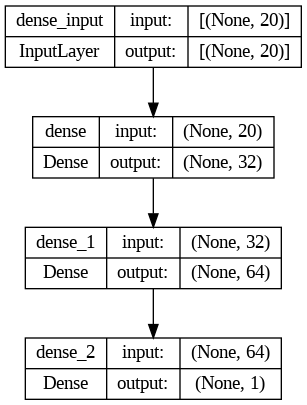

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(spfnet, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=150, verbose=2)

Epoch 1/150
99/99 - 2s - loss: 0.4712 - root_mean_squared_error: 0.6865 - val_loss: 0.2678 - val_root_mean_squared_error: 0.5175 - 2s/epoch - 23ms/step
Epoch 2/150
99/99 - 1s - loss: 0.2529 - root_mean_squared_error: 0.5029 - val_loss: 0.2538 - val_root_mean_squared_error: 0.5038 - 640ms/epoch - 6ms/step
Epoch 3/150
99/99 - 1s - loss: 0.2414 - root_mean_squared_error: 0.4913 - val_loss: 0.2428 - val_root_mean_squared_error: 0.4927 - 646ms/epoch - 7ms/step
Epoch 4/150
99/99 - 1s - loss: 0.2335 - root_mean_squared_error: 0.4832 - val_loss: 0.2462 - val_root_mean_squared_error: 0.4962 - 625ms/epoch - 6ms/step
Epoch 5/150
99/99 - 1s - loss: 0.2268 - root_mean_squared_error: 0.4762 - val_loss: 0.2380 - val_root_mean_squared_error: 0.4879 - 649ms/epoch - 7ms/step
Epoch 6/150
99/99 - 1s - loss: 0.2213 - root_mean_squared_error: 0.4704 - val_loss: 0.2412 - val_root_mean_squared_error: 0.4912 - 725ms/epoch - 7ms/step
Epoch 7/150
99/99 - 1s - loss: 0.2205 - root_mean_squared_error: 0.4696 - val_

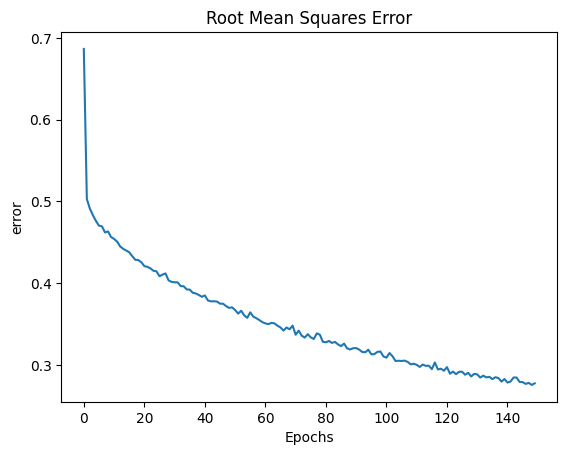

In [ ]:

plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [ ]:
spfnet.evaluate(X_train, y_train)

99/99 [==============================] - 0s 1ms/step - loss: 0.0682 - root_mean_squared_error: 0.2612


[0.06823161244392395, 0.2612118124961853]

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

33/33 [==============================] - 0s 1ms/step


477.56880312920003

In [ ]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

99/99 [==============================] - 0s 2ms/step


244.22867857738518

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7408143506943646

In [ ]:
r2_score(train_pred_orig, y_train_orig)

0.9256880281952096

In [ ]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[1713.83776855, 1485.1517    ],
       [ 454.35427856,  238.13972   ],
       [2001.39416504, 1662.2218    ],
       ...,
       [2259.99975586, 2766.8408    ],
       [ 621.44915771,  591.26963   ],
       [1521.23120117, 1004.3757    ]])

In [ ]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2489.80664062, 2511.2375    ],
       [ 650.05682373,  480.20512   ],
       [2019.98596191, 2017.5687    ],
       ...,
       [ 417.18569946,  523.50056   ],
       [2635.01977539, 2506.2019    ],
       [ 652.6206665 ,  484.93113   ]])

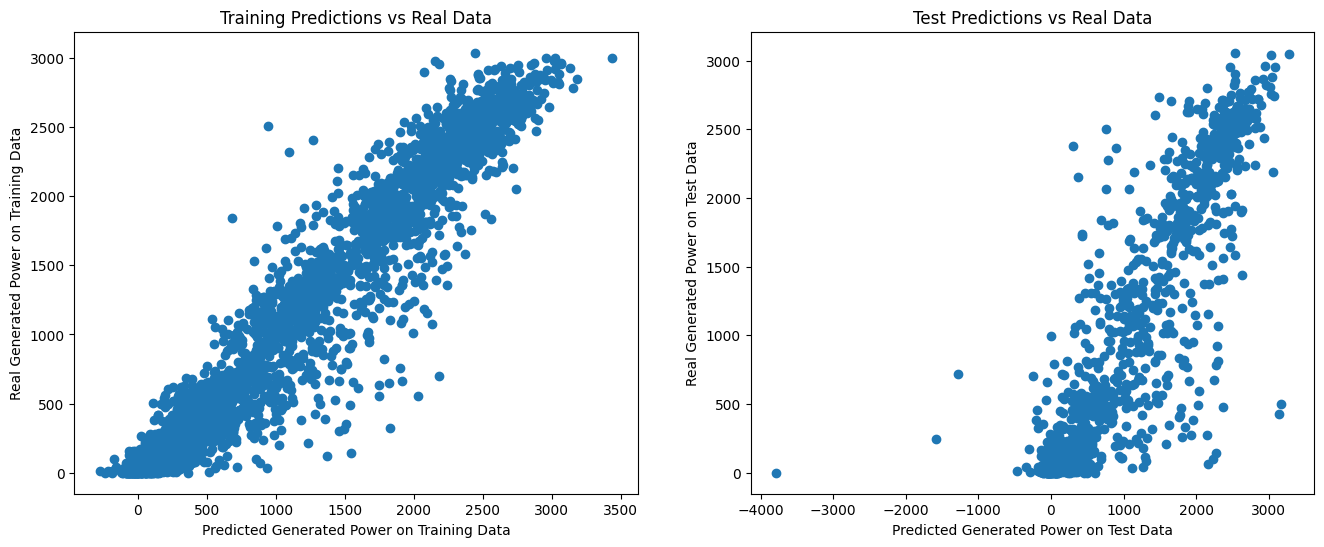

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

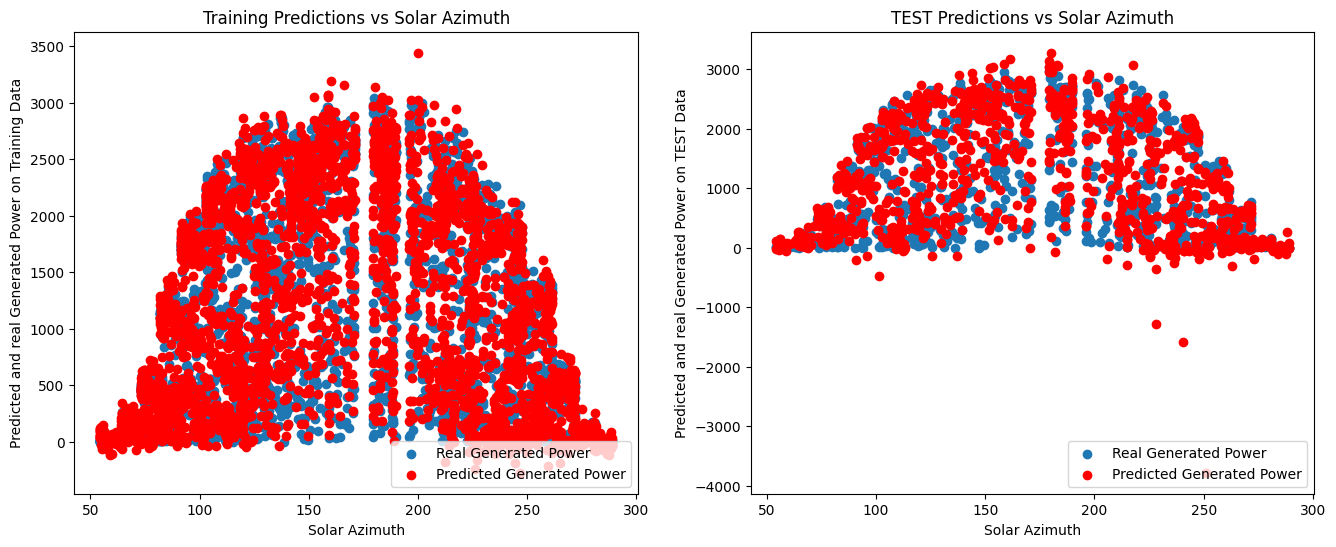

In [ ]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

In [ ]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data=results)
results.columns = ['Real Solar Power Produced', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[7:18]

,Real Solar Power Produced,Predicted Solar Power
7,"2,497.53","2,336.26"
8,514.65,366.25
9,916.92,"1,261.39"
10,"1,911.95","1,866.66"
11,35.15,-32.67
12,"2,449.04","2,418.47"
13,38.84,"1,265.85"
14,823.41,"1,834.41"
15,"2,274.65","2,159.54"
16,"1,123.40","1,124.30"


In [ ]:
sc = StandardScaler()
pred_whole = spfnet.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

132/132 [==============================] - 0s 1ms/step


array([[ 672.5    ],
       [1353.9377 ],
       [2319.2712 ],
       ...,
       [ 585.81464],
       [ 277.22787],
       [  80.00338]], dtype=float32)

In [ ]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [ ]:
r2_score(pred_whole_orig, y)

0.8770683296721824

In [ ]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Whole Data Frame,0.877068
R2 Score of Training Set,0.925688
R2 Score of Test Set,0.740814
Mean of Test Set,1181.546021
Standard Deviation pf Test Set,938.059753
Relative Standard Deviation,0.793926


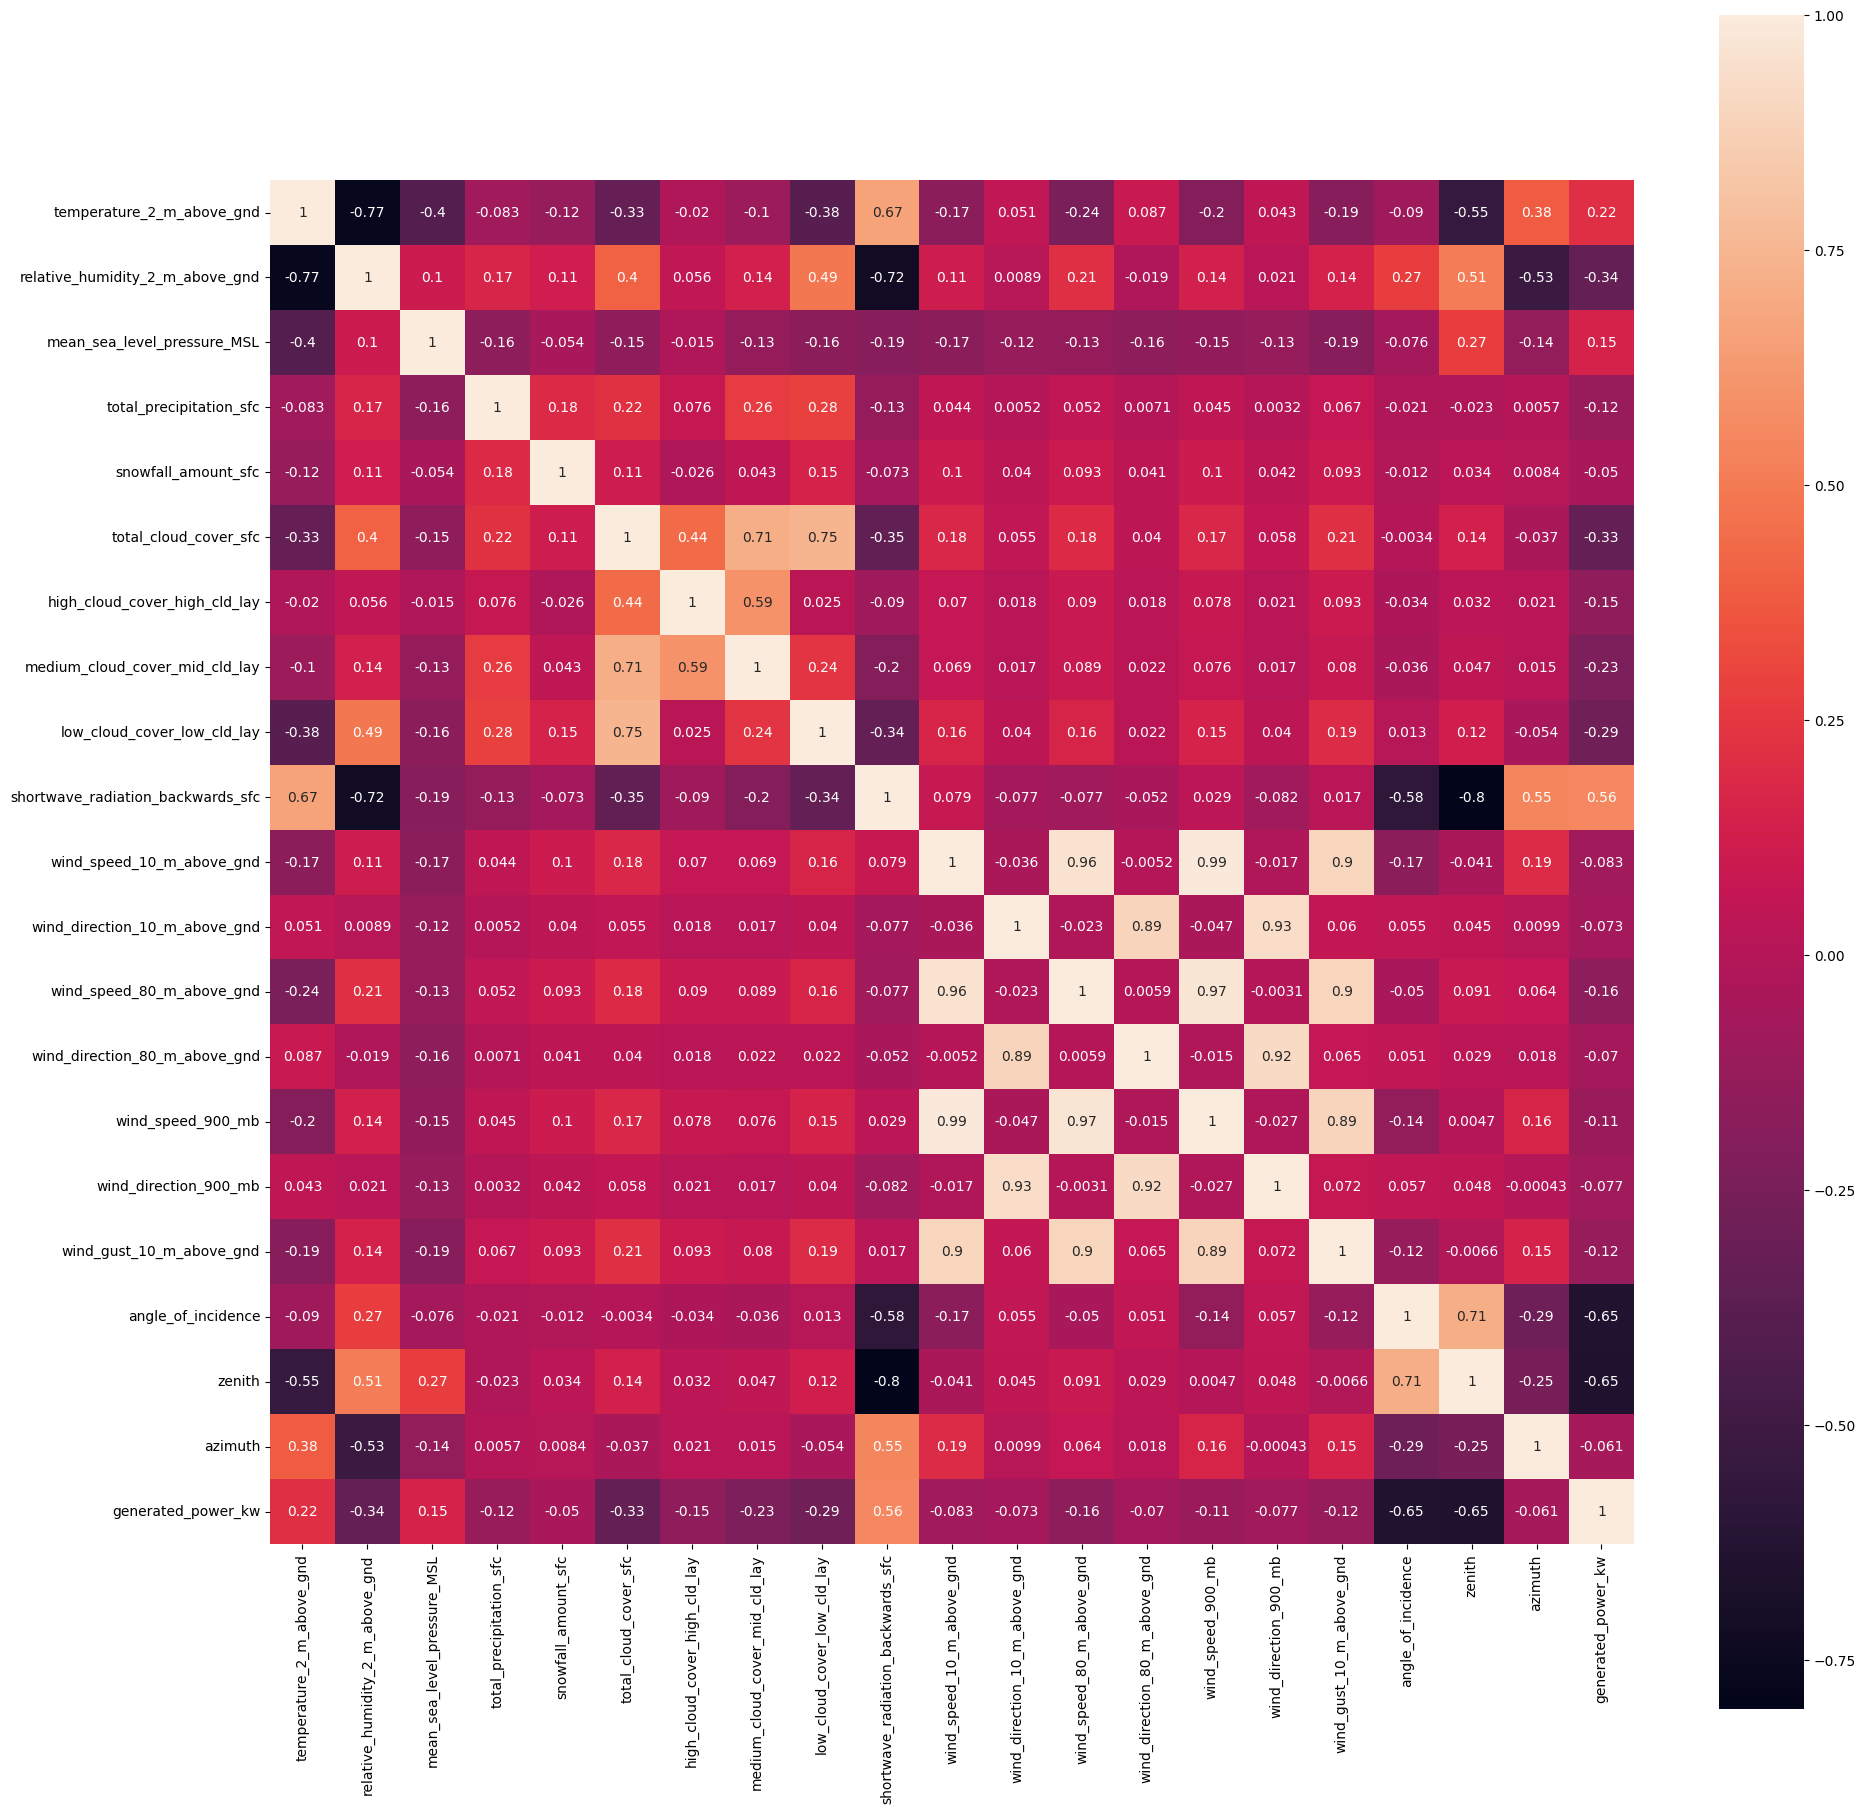

In [ ]:
corr = dts.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=dts.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.38
mean_sea_level_pressure_MSL,0.12
wind_speed_80_m_above_gnd,0.07
wind_speed_10_m_above_gnd,0.02
snowfall_amount_sfc,0.02
wind_direction_80_m_above_gnd,0.01
wind_direction_10_m_above_gnd,0.01
wind_direction_900_mb,-0.00
total_precipitation_sfc,-0.00
wind_gust_10_m_above_gnd,-0.03


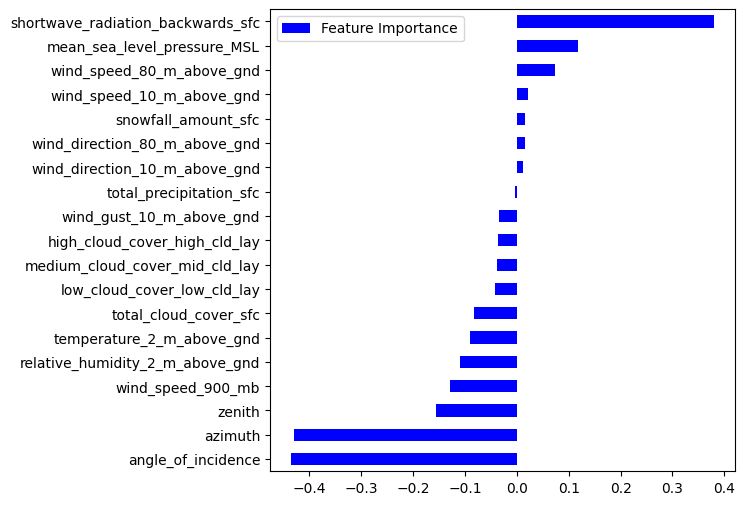

In [ ]:
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')